### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

In [1]:
%run init.ipynb

# Algoritmo de Bernstein-Vazirani

Vamos considerar uma função 
$$f:\{0,1\}^{n}\rightarrow \{0,1\}.$$
Ou seja, $f$ tem como input sequências de $n$ bits $x=x_{n-1}\cdots x_{1}x_{0}$ com $x_{j}=0$ ou $x_{j}=1$ para $j=0,\cdots,n-1$ e tem como output 0 ou 1. Vamos considerar um oráculo que contém uma __sequência secreta__ de bits 
$$s=s_{n-1}\cdots s_{1}s_{0}$$ 
e que, em cada _query_, nos retorna
$$f_{s}(x) = s\cdot x \equiv s\cdot x\mod2 = \sum_{j=0}^{n-1}s_{j}x_{j}\mod2.$$ 
O problema a ser resolvido é encontrar $s$:
$$s=?$$

Como cada pergunta ao oráculo nos fornece um único escalar como resposta, _classicamente_ o melhor que podemos fazer é fazer as seguintes $n$ perguntas:
\begin{align}
& f(100\cdots 00) = s_{n-1}, \\
& f(010\cdots 00) = s_{n-2}, \\
& f(001\cdots 00) = s_{n-3}, \\
& \vdots \\
& f(000\cdots 10) = s_{1}, \\
& f(000\cdots 01) = s_{0}.
\end{align}
Como exemplo, consideremos $n=3$ e $s=101$. Teremos que 
\begin{align}
& f(100) = 1s_{2}+0s_{1}+0s_{0} = s_{2},\\
& f(010) = 0s_{2}+1s_{1}+0s_{0} = s_{1}, \\
& f(001) = 0s_{2}+0s_{1}+1s_{0} = s_{0}.
\end{align}

_Quanticamente_, assim como no algoritmo de Deutsch-Jozsa (ADJ), começamos com $n+1$ qubits preparados no estado
$$|+\rangle^{\otimes n}\otimes|-\rangle = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes|-\rangle =\frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes\big(|0\rangle-|1\rangle\big).$$
O oráculo funciona de forma similar a no caso do ADJ ($U_{f}|x\rangle|y\rangle = |x\rangle|y\oplus f(x)\rangle$):
$$U_{s}|x\rangle|y\rangle = |x\rangle|y\oplus s\cdot x\rangle.$$
Com isso, teremos que
\begin{align}
U_{s}|+\rangle^{n}|-\rangle & = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(U_{s}|x\rangle|0\rangle - U_{s}|x\rangle|1\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(|x\rangle|0\oplus s\cdot x\rangle - |x\rangle|1\oplus s\cdot x\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\big(|s\cdot x\rangle - |\overline{s\cdot x}\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}|x\rangle(-1)^{s\cdot x}\big(|0\rangle - |1\rangle\big) \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle |-\rangle.
\end{align}
Esse é o chamado __phase kickback__, pois a fase dependente de $x$ acaba sendo adicionada a este estado. Usar o estado $|-\rangle$ para o qubit auxiliar é importante para este método.

O algoritmo de Bernstein-Vazirani está ilustrado na figura abaixo.
<img src='fig_bernstein_vazirani.png' width='300'>

Os estados
$$|\psi_{s}\rangle := \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle$$
formam um conjunto ortonormal
\begin{align}
\langle\psi_{s}|\psi_{t}\rangle & = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{s\cdot x}\langle x|\sum_{y=0}^{2^{n}}(-1)^{t\cdot y}|y\rangle \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}}(-1)^{s\cdot x + t\cdot y}\langle x|y\rangle = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}}(-1)^{s\cdot x + t\cdot y}\delta_{y,x} \\
& = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{s\cdot x + t\cdot x} \\
& = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{(s+t)\cdot x},
\end{align}
em que usamos
\begin{align}
s\cdot x + t\cdot x & = \sum_{j=0}^{n-1}s_{j}x_{j}\mod2 + \sum_{j=0}^{n-1}t_{j}x_{j}\mod2 \\
& = \Big(\sum_{j=0}^{n-1}s_{j}x_{j} + \sum_{j=0}^{n-1}t_{j}x_{j}\Big)\mod2 \\
& = \sum_{j=0}^{n-1}(s_{j}+t_{j})x_{j}\mod2 \\
& = (s+t)\cdot x.
\end{align}

Agora, para um dado $k=s+t$ teremos
\begin{align}
\sum_{x=0}^{2^{n}}(-1)^{k\cdot x} & \equiv \sum_{x_{1}=0}^{1}\sum_{x_{2}=0}^{1}\cdots\sum_{x_{n}=0}^{1} (-1)^{k_{1}x_{1}+k_{2}x_{2}+\cdots+k_{n}x_{n}} \\
 & = \sum_{x_{1}=0}^{1}(-1)^{k_{1}x_{1}}\sum_{x_{2}=0}^{1}(-1)^{k_{2}x_{2}}\cdots\sum_{x_{n}=0}^{1} (-1)^{k_{n}x_{n}} \\
& = 2\delta_{k_{1},0}2\delta_{k_{2},0}\cdots 2\delta_{k_{n},0} \\
& = 2^{n}\delta_{k,0},
\end{align}
em que usamos
$$\sum_{x_{j}=0}^{1}(-1)^{k_{j}x_{j}} = (-1)^{k_{j}0}+(-1)^{k_{j}1} = 1+(-1)^{k_{j}} = 2\delta_{k_{j},0}.$$ 
Por conseguinte
$$\langle\psi_{s}|\psi_{t}\rangle = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{(s+t)\cdot x} =  \frac{1}{2^{n}}2^{n}\delta_{s+t,0} = \delta_{s,t},$$
pois a soma é feita bit a bit, e assim
$$s+t=0\ \therefore\ s=t.$$

Podemos verificar também que essa base é completa:
\begin{align}
\sum_{s=0}^{2^{n}-1}|\psi_{s}\rangle\langle\psi_{s}| & = \sum_{s=0}^{2^{n}-1}\frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle\frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{s\cdot y}\langle y| \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}-1}\Big(\sum_{s=0}^{2^{n}-1}(-1)^{s\cdot(x+y)}\Big)|x\rangle\langle y| \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}-1}2^{n}\delta_{x,y}|x\rangle\langle y| \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\langle x| = \mathbb{I}_{2^{n}}.
\end{align}
A importância de $\{|\psi_{s}\rangle\}$ formar uma base ortonormal é que a princípio podemos medir nessa base, descobrindo assim o valor de $s$.

Agora, tendo o estado 
$$U_{s}|+\rangle^{\otimes n}|-\rangle = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle |-\rangle=|\psi_{s}\rangle|-\rangle,$$
vejamos como obter $s$. Consideremos a chamada __transformada de Hadamard__. Lembremos da porta de Hadamard,
$$H=\frac{1}{2^{1/2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix} = \frac{1}{2^{1/2}}\sum_{x,y=0}^{1}(-1)^{xy}|x\rangle\langle y|,$$
para escrever
\begin{align}
H^{\otimes n} & = H\otimes H\otimes\cdots\otimes H \\
& = \frac{1}{2^{1/2}}\sum_{x_{1},y_{1}=0}^{1}(-1)^{x_{1}y_{1}}|x_{1}\rangle\langle y_{1}|\otimes \frac{1}{2^{1/2}}\sum_{x_{2},y_{2}=0}^{1}(-1)^{x_{2}y_{2}}|x_{2}\rangle\langle y_{2}|\otimes\cdots\otimes \frac{1}{2^{1/2}}\sum_{x_{n},y_{n}=0}^{1}(-1)^{x_{n}y_{n}}|x_{n}\rangle\langle y_{n}| \\
& = \frac{1}{2^{n/2}}\sum_{x_{1},x_{2},\cdots,x_{n},y_{1},y_{2},\cdots,y_{n}=0}^{1}(-1)^{x_{1}y_{1}+x_{2}y_{2}+\cdots+x_{n}y_{n}}|x_{1}x_{2}\cdots x_{n}\rangle\langle y_{1}y_{2}\cdots y_{n}| \\
& = \frac{1}{2^{n/2}}\sum_{x,y=0}^{2^{n}-1}(-1)^{x\cdot y}|x\rangle\langle y| \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{x\cdot y}\langle y| \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\langle\psi_{x}|.
\end{align}

Com isso, vem que
\begin{align}
H^{\otimes n}U_{s}|+\rangle^{\otimes n}|-\rangle & = H^{\otimes n}|\psi_{s}\rangle|-\rangle \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\langle\psi_{x}|\psi_{s}\rangle|-\rangle \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\delta_{x,s}|-\rangle \\
& = |s\rangle\otimes|-\rangle.
\end{align}
Portanto, medindo os $n$ primeiros qubits na base computacional, descobriremos o valor de $s$. O circuito quântico completo para o algoritmo de Bernstein-Vazirani está mostrado na sequência, e é bem parecido com aquele referente ao algoritmo de Deutsch-Jozsa.

In [24]:
from qiskit import *
nshots = 8192
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
simulator = Aer.get_backend('qasm_simulator')
device = provider.get_backend('ibmq_jakarta')
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor, backend_overview, backend_monitor

ibmqfactory.load_account:WARNING:2022-07-07 16:37:05,933: Credentials are already in use. The existing account in the session will be replaced.


In [17]:
def bernstein_vazirani(s):
    ls = len(s)
    qc = QuantumCircuit(ls+1,ls)
    qc.h(range(ls))
    qc.x(ls)
    qc.h(ls)
    qc.barrier();
    for ii, yesno in enumerate(reversed(s)): # the black box
        if yesno == '1':
            qc.cx(ii, ls);
    qc.barrier();
    qc.h(range(ls));
    qc.barrier();
    qc.measure(range(ls),range(ls))
    return qc

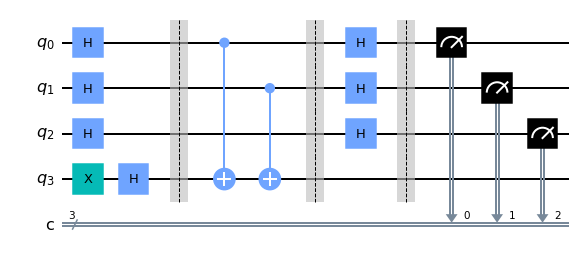

In [18]:
s = '011' # secretnumber
qc = bernstein_vazirani(s)
qc.draw(output='mpl')

In [19]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'011': 1}


In [26]:
jobE = execute(qc, backend = device, shots = nshots)
job_monitor(jobE)

Job Status: job has successfully run


In [28]:
jobS = execute(qc, backend = simulator, shots = nshots)

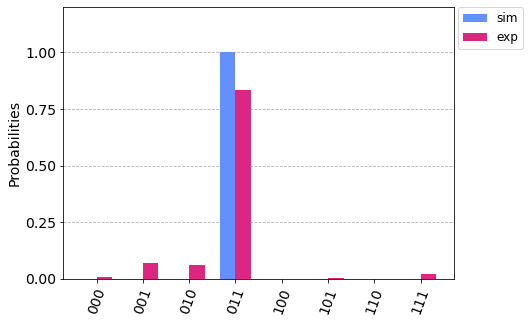

In [29]:
plot_histogram([jobS.result().get_counts(0), jobE.result().get_counts(0)], 
               bar_labels = False, legend = ['sim', 'exp'])

# Algoritmo de Bernstein-Vazirani recursivo

Um problema com o problema de Bernstein-Vazirani é que ele é tratável classicamente, pois a complexidade computacional é polinomial no número de bits, $\mathcal{O}(n)$. Estes autores desenlveram um problema relacionado que é não tratável classicamente, obtendo assim uma separação entre os algoritmos clássico e quântico.

No __problema de Bersntein-Vazirani recursivo__ (PBVR) a entrada para o oráculo são 2 strings de $n$ bits cada $j\in\{0,1\}^{n}$ e $k\in\{0,1\}^{n}$. A função calculada pelo oráculo é tal que 
$$f(j,k)=s_{j}\cdot k,$$
com $s_{j}$ sendo uma de $2^{n}$ bit-strings indexadas por $j\in\{0,1\}^{n}$.
Quando calculamos uma função de $s_{j}$, exigimos que
$$g(s_{j}) = j\cdot s.$$

O Algoritmo de Bernstein-Vazirani recursivo de nível 2 está ilustrado na figura abaixo.
<img src='fig_bernstein_vazirani_recursivo.png' width='600'>

O estado Inicial é 
$$|\Psi_{0}\rangle=|0\rangle^{\otimes 2n}|1\rangle^{\otimes 2}.$$
Aplicando as portas de Hadamard teremos
\begin{align}
|\Psi_{1}\rangle & = H^{\otimes(2n+2)}|\Psi_{0}\rangle \\
& = \frac{1}{2^{n}}\sum_{j,k=0}^{2^{n}-1}|j\rangle|k\rangle|-\rangle|-\rangle.
\end{align}
O oráculo é representado pelo operador unitário
$$U = \sum_{j,k=0}^{2^{n}-1}\sum_{l=0}^{1}|jk\rangle\langle jk|\otimes|l\oplus(s_{j}\cdot k)\rangle\langle l|.$$

Atuando o oráculo, obteremos o estado
\begin{align}
|\Psi_{2}\rangle & = U\otimes\mathbb{I}|\Psi_{1}\rangle \\
& = \Big(\sum_{j,k=0}^{2^{n}-1}\sum_{l=0}^{1}|jk\rangle\langle jk|\otimes|l\oplus(s_{j}\cdot k)\rangle\langle l|\otimes\mathbb{I}\Big)\Big(\frac{1}{2^{n}}\sum_{j',k'=0}^{2^{n}-1}|j'\rangle|k'\rangle|-\rangle|-\rangle\Big) \\
& = \frac{1}{2^{n}}\sum_{j,k=0}^{2^{n}-1}|j\rangle|k\rangle\otimes\sum_{l=0}^{1}\langle l|-\rangle|l\oplus(s_{j}\cdot k)\rangle\otimes|-\rangle \\
& = \frac{1}{2^{n}}\sum_{j,k=0}^{2^{n}-1}|j\rangle|k\rangle\otimes\frac{1}{\sqrt{2}}\big(|0\oplus(s_{j}\cdot k)\rangle-|1\oplus(s_{j}\cdot k)\rangle\big)\otimes|-\rangle \\
& = \frac{1}{2^{n}}\sum_{j,k=0}^{2^{n}-1}|j\rangle|k\rangle\otimes\frac{1}{\sqrt{2}}\big(|s_{j}\cdot k\rangle-|\overline{s_{j}\cdot k}\rangle\big)\otimes|-\rangle \\
& = \frac{1}{2^{n/2}}\sum_{j=0}^{2^{n}-1}|j\rangle\Big(\frac{1}{2^{n/2}}\sum_{k=0}^{2^{n}-1}(-1)^{s_{j}\cdot k}|k\rangle\Big)|-\rangle|-\rangle \\
& = \frac{1}{2^{n/2}}\sum_{j=0}^{2^{n}-1}|j\rangle|\psi_{s_{j}}\rangle|-\rangle|-\rangle.
\end{align}

Aplicando portas de Hadamard no qubits do 2º registro, 
$$H^{\otimes n} = \sum_{k=0}^{2^{n}-1}|k\rangle\langle\psi_{k}|,$$
obteremos
\begin{align}
|\Psi_{3}\rangle & = \mathbb{I}_{n}\otimes H^{\otimes n}\mathbb{I}_{2} \\
& = \frac{1}{2^{n/2}}\sum_{j=0}^{2^{n}-1}|j\rangle\Big(\sum_{k=0}^{2^{n}-1}|k\rangle\langle\psi_{k}|\psi_{s_{j}}\rangle\Big)|-\rangle|-\rangle \\
& = \frac{1}{2^{n/2}}\sum_{j=0}^{2^{n}-1}|j\rangle\Big(\sum_{k=0}^{2^{n}-1}|k\rangle\delta_{k,s_{j}}\Big)|-\rangle|-\rangle \\
& = \frac{1}{2^{n/2}}\sum_{j=0}^{2^{n}-1}|j\rangle|s_{j}\rangle|-\rangle|-\rangle.
\end{align}

Até aqui foi basicamente uma repetição do algoritmo de Bernstein-Vazirani não recursivo. Para incluir o cálculo da função $g$, usamos um operador unitário que atua como segue:
$$G = \sum_{j=0}^{2^{n}-1}\sum_{l=0}^{1}|j\rangle\langle j|\otimes|l\oplus g(j)\rangle\langle l|.$$
Atuando $G$ nos 2º e 4º registros, obteremos
\begin{align}
|\Psi_{4}\rangle & = G|\Psi_{3}\rangle \\
& = \Big(\mathbb{I}_{n}\otimes\sum_{j'=0}^{2^{n}-1}\sum_{l=0}^{1}|j'\rangle\langle j'|\otimes\mathbb{I}_{1}\otimes|g(j')\oplus l\rangle\langle l|\Big)\Big(\frac{1}{2^{n/2}}\sum_{j=0}^{2^{n}-1}|j\rangle|s_{j}\rangle|-\rangle|-\rangle\Big) \\
& = \frac{1}{2^{n/2}}\sum_{j,j'=0}^{2^{n}-1}|j\rangle\otimes\langle j'|s_{j}\rangle|j'\rangle|-\rangle\otimes\Big(\sum_{l=0}^{1}\langle l|-\rangle|l\oplus g(j')\rangle\Big) \\
& = \frac{1}{2^{n/2}}\sum_{j,j'=0}^{2^{n}-1}|j\rangle\otimes\delta_{j',s_{j}}|j'\rangle|-\rangle\otimes\Big(\frac{1}{\sqrt{2}}\big(|0\oplus g(j')\rangle-|1\oplus g(j')\rangle\big)\Big) \\
& = \frac{1}{2^{n/2}}\sum_{j=0}^{2^{n}-1}|j\rangle|s_{j}\rangle|-\rangle\otimes\Big(\frac{1}{\sqrt{2}}\big(|g(s_{j})\rangle-|\overline{g(s_{j})}\rangle\big)\Big) \\
& = \frac{1}{2^{n/2}}\sum_{j=0}^{2^{n}-1}(-1)^{g(s_{j})}|j\rangle|s_{j}\rangle|-\rangle|-\rangle.
\end{align}

Seguindo, aplicamos portas de Hadamard nos qubits do 2º registro, mas usando
$$H^{\otimes n}=\frac{1}{2^{n/2}}\sum_{j,k=0}^{2^{n}-1}(-1)^{j\cdot k}|j\rangle\langle k|.$$
Com isso, obteremos o estado
\begin{align}
|\Psi_{5}\rangle & = \mathbb{I}_{n}\otimes H^{\otimes n}\mathbb{I}_{2} \\
& = \frac{1}{2^{n/2}}\sum_{j=0}^{2^{n}-1}(-1)^{g(s_{j})}|j\rangle\Big(\frac{1}{2^{n/2}}\sum_{j',k=0}^{2^{n}-1}(-1)^{j'\cdot k}|j'\rangle\langle k|s_{j}\rangle\Big)|-\rangle|-\rangle \\
& = \frac{1}{2^{n/2}}\sum_{j=0}^{2^{n}-1}(-1)^{g(s_{j})}|j\rangle\Big(\frac{1}{2^{n/2}}\sum_{j',k=0}^{2^{n}-1}(-1)^{j'\cdot k}|j'\rangle\delta_{k,s_{j}}\Big)|-\rangle|-\rangle \\
& = \frac{1}{2^{n}}\sum_{j,j'=0}^{2^{n}-1}(-1)^{g(s_{j})}(-1)^{j'\cdot s_{j}}|j\rangle|j'\rangle|-\rangle|-\rangle.
\end{align}

Seguindo, aplicamos novamente o oráculo para obter
\begin{align}
|\Psi_{6}\rangle & = U\otimes\mathbb{I}_{1}|\Psi_{5}\rangle \\
& = \Big(\sum_{j',k'=0}^{2^{n}-1}\sum_{l=0}^{1}|j'k'\rangle\langle j'k'|\otimes|l\oplus(s_{j'}\cdot k')\rangle\langle l|\otimes\mathbb{I}_{1}\Big)\Big(\frac{1}{2^{n}}\sum_{j,k=0}^{2^{n}-1}(-1)^{g(s_{j})}(-1)^{k\cdot s_{j}}|j\rangle|k\rangle|-\rangle|-\rangle\Big) \\
& = \frac{1}{2^{n}}\sum_{j,k,j',k'=0}^{2^{n}-1}(-1)^{g(s_{j})}(-1)^{k\cdot s_{j}}\delta_{j,j'}|j'\rangle\delta_{k,k'}|k'\rangle\Big(\sum_{l=0}^{1}\langle l|-\rangle|l\oplus(s_{j'}\cdot k')\rangle\Big)|-\rangle \\
& = \frac{1}{2^{n}}\sum_{j,k=0}^{2^{n}-1}(-1)^{g(s_{j})}(-1)^{k\cdot s_{j}}|j\rangle|k\rangle\Big(\frac{1}{\sqrt{2}}\big(|0\oplus(s_{j}\cdot k)\rangle-|1\oplus(s_{j}\cdot k)\rangle\big)\Big)|-\rangle \\
& = \frac{1}{2^{n}}\sum_{j,k=0}^{2^{n}-1}(-1)^{g(s_{j})}(-1)^{k\cdot s_{j}}|j\rangle|k\rangle\Big(\frac{1}{\sqrt{2}}\big(|s_{j}\cdot k\rangle-|\overline{s_{j}\cdot k}\rangle\big)\Big)|-\rangle \\
& = \frac{1}{2^{n}}\sum_{j,k=0}^{2^{n}-1}(-1)^{g(s_{j})}(-1)^{k\cdot s_{j}}(-1)^{k\cdot s_{j}}|j\rangle|k\rangle|-\rangle|-\rangle \\
& = \frac{1}{2^{n}}\sum_{j,k=0}^{2^{n}-1}(-1)^{g(s_{j})}|j\rangle|k\rangle|-\rangle|-\rangle \\
& = \frac{1}{2^{n/2}}\sum_{j=0}^{2^{n}-1}(-1)^{s\cdot j}|j\rangle\Big(\frac{1}{2^{n/2}}\sum_{k=0}^{2^{n}-1}|k\rangle\Big)|-\rangle|-\rangle \\
& =: |\psi_{s}\rangle|\psi\rangle|-\rangle|-\rangle,
\end{align}
em que definimos
$$|\psi\rangle := \frac{1}{2^{n/2}}\sum_{k=0}^{2^{n}-1}|k\rangle$$
e usamos
$$|\psi_{s}\rangle = \frac{1}{2^{n/2}}\sum_{j=0}^{2^{n}-1}(-1)^{s\cdot j}|j\rangle.$$

Por fim, aplicamos portas de Hadamard nos qubits do 1º registro. Usamos
$$H^{\otimes n} = \sum_{j=0}^{2^{n}-1}|j\rangle\langle\psi_{j}|$$ para obter
\begin{align}
|\Psi_{7}\rangle & = \big(H^{\otimes n}\otimes\mathbb{I}_{n+2}\big)|\Psi_{6}\rangle \\
& = \Big(\sum_{j=0}^{2^{n}-1}|j\rangle\langle\psi_{j}|\Big)|\psi_{s}\rangle|\psi\rangle|-\rangle|-\rangle \\
& = |s\rangle|\psi\rangle|-\rangle|-\rangle.
\end{align}
Medindo os qubits do 1º registro na base computacional, obtemos o valor de $s$.

Esse procedimento pode ser repetido $k$ vezes. No nível $k$ da recursão, a entrada para o oráculo são $k$ strings com $n$ bits cada. O oráculo retorna
$$f(x_{1},\cdots,x_{k})=x_{k}\cdot s_{x_{1},\cdots,x_{k-1}}$$
tal que
$$g(s_{x_{1},\cdots,x_{k-1}}) = x_{k-1}\cdot s_{x_{1},\cdots,x_{k-2}}.$$
Em ambos os casos $s_{j}\in\{0,1\}^{n}.$
Esse processo continua até que no último nível de recursão teremos 
$$g(s_{x_{1}}) = s\cdot x_{1}.$$

A complexidade quântica neste caso é $\mathcal{O}(n)$ enquanto que a complexidade clássica é $\mathcal{O}(n^{\log n})$. Existe assim uma separação superpolinomial clássico-quântica para o algoritmo de Bernstein-Vazirani recursivo. Este algoritmo tem importância histórica por ter sido a 1ª evidência sólida de que computadores quânticos poderiam desafiar algoritmos clássicos no que concerna à complexidade computacional.

##### References:
- Dave Bacon, Quantum Computing Course, https://courses.cs.washington.edu/courses/cse599d/06wi/.